In [2]:
from torchvision import transforms, models
import torch

import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
from data.camMethods import imageMapping
from data.camMethods import preprocessingImage
from data.camMethods import visualizationCAM
from data.Hook import maxActivisionValue

from data.gradcamMethods import gradCamMethod
from data.gradcamMethods import predictionForList

In [3]:
PATH_TO_SET = 'dataset/catset'

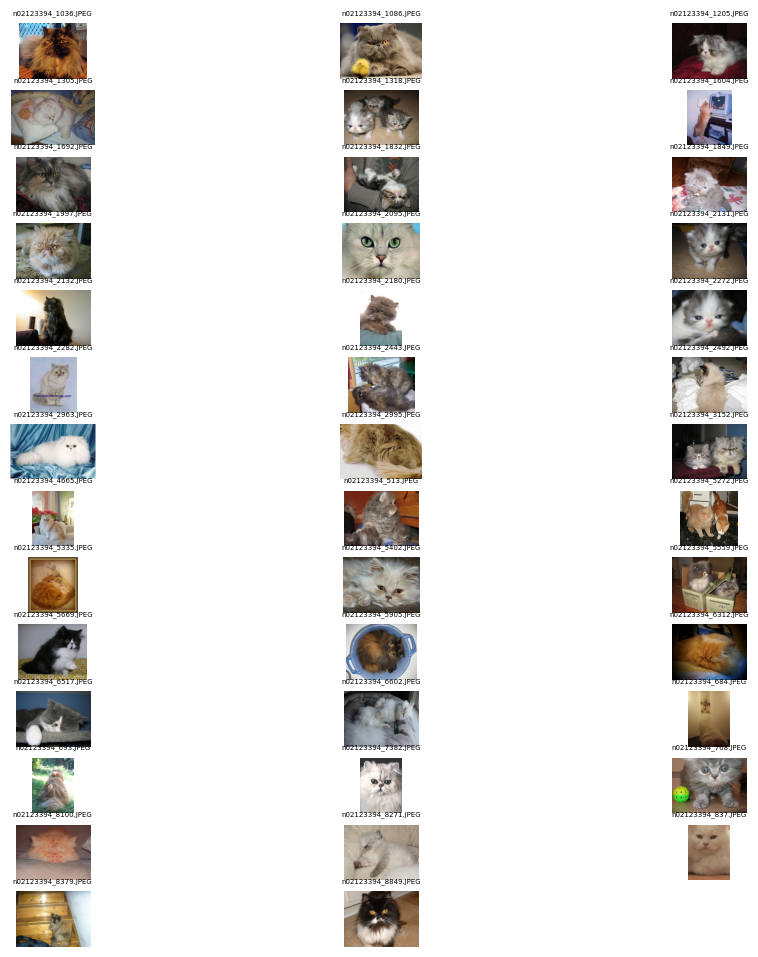

In [5]:
listImage = imageMapping(PATH_TO_SET)

41 
 torch.Size([1, 3, 224, 224])


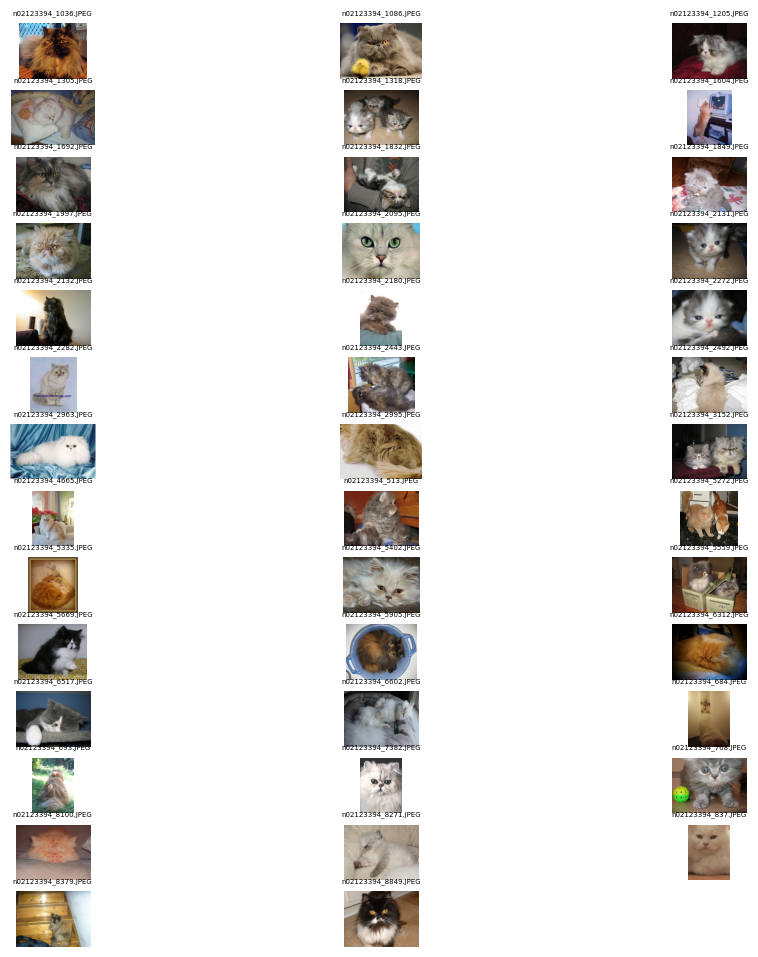

In [6]:
listImage = imageMapping(PATH_TO_SET)
preprocessingList = preprocessingImage(listImage)
print(len(preprocessingList), '\n', preprocessingList[0].shape)

In [7]:

model = models.resnet50()
model.load_state_dict(torch.load('model_parameters/resnet50-0676ba61.pth'))
model.eval()
print()

In [8]:
# preprocessingList
# PATH_TO_SET

def convertationTo(preprocessingList : list) -> list:
    sumRGB = [rgb[:,:,0]+ rgb[:,:,1]+ rgb[:,:,2] for rgb in preprocessingList]# 224 224 sum
    convertListOfImage = [(rel - np.min(rel))/ (np.max(rel)- np.min(rel)) for rel in sumRGB]
    return convertListOfImage